In [1]:
import pandas as pd
import georinex as gr
import misc
from plots import *
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

# Prepare the data

In [2]:
# Load log files
measurements_log = ['Raw', 'Fix']
measurements_RINEX = sum([[f"{y}{x}" for y in ['C', 'L', 'D', 'S']] for x in ['1C', '5Q', '2I', '5P']], [])
# measurements_RINEX = ['L1C', 'L5Q']
# # 'C1C', 'C5Q', 'C2I', 'C5P'

logs = []

log = LogReader(manufacturer="Google", device="Pixel 7", specifiedTags=measurements_log, mode="logger", 
                filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_GooglePixel7_20230801110405_modified.txt")
log.ref = RinexReader('Reference', 
            filepath='../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.23O',
              tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
              meas=measurements_RINEX, sampling=1)
log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.pos')
logs.append(log)

# log = LogReader(manufacturer="Google", device="Pixel Watch", specifiedTags=measurements_log, mode="mimir", 
#                 filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_GooglePixelWatch_20230801110404_modified.txt")
# log.ref = gr.load('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.23O',
#               tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
#               meas=measurements_RINEX)
# log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover /NMND17420010S_2023-08-01_08-14-05.pos')
# logs.append(log)

# log = LogReader(manufacturer="OnePlus", device="Nord 2", specifiedTags=measurements_log, mode="mimir", 
#                 filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_OnePlusNord2_20230811103018_modified.txt")
# log.ref = gr.load('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-40-20.23O',
#               tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
#               meas=measurements_RINEX)
# log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-40-20.pos')
# logs.append(log)

# log = LogReader(manufacturer="Samsung", device="A52", specifiedTags=measurements_log, mode="mimir", 
#                 filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_SamsungA52_20230811101903_modified.txt")
# log.ref = gr.load('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-29-33.23O',
#               tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
#               meas=measurements_RINEX)
# log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-29-33.pos')
# logs.append(log)

# log = LogReader(manufacturer="Xiaomi", device="11T", specifiedTags=measurements_log, mode="mimir", 
#                 filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_Xiaomi11T_20230801111451_modified.txt")
# log.ref = gr.load('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-24-35.23O',
#               tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
#              meas=measurements_RINEX)
# log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-24-35.pos')
# logs.append(log)

device_list = [log.device for log in logs]

In [3]:
log.raw.loc[log.raw['prn'].isin(['C20-L5']), ['CarrierFrequencyHz']]


,CarrierFrequencyHz
datetime,
2023-08-01 08:04:08.082,1.176450e+09
2023-08-01 08:04:11.227,1.176450e+09
2023-08-01 08:04:12.253,1.176450e+09
2023-08-01 08:04:14.230,1.176450e+09
2023-08-01 08:04:15.265,1.176450e+09
...,...
2023-08-01 08:13:38.277,1.176450e+09
2023-08-01 08:13:42.268,1.176450e+09
2023-08-01 08:13:43.267,1.176450e+09


In [4]:
log.pos.df

,provider,timestamp,latitude,longitude,altitude
datetime,,,,,
2023-08-01 08:02:24,REF,1.690877e+09,61.449220,23.856275,163.0174
2023-08-01 08:02:25,REF,1.690877e+09,61.449220,23.856275,163.0176
2023-08-01 08:02:26,REF,1.690877e+09,61.449220,23.856275,163.0219
2023-08-01 08:02:27,REF,1.690877e+09,61.449220,23.856275,163.0271
2023-08-01 08:02:28,REF,1.690877e+09,61.449221,23.856274,163.0304
...,...,...,...,...,...
2023-08-01 08:14:01,REF,1.690878e+09,61.449225,23.856271,163.0527
2023-08-01 08:14:02,REF,1.690878e+09,61.449225,23.856272,163.0551
2023-08-01 08:14:03,REF,1.690878e+09,61.449223,23.856275,162.7483


In [5]:
log.ref.df

#log.ref.df.groupby('sv')['L1C_error'].plot(ylim=[-3, 3], style='.') 
#log.ref.df['L1C_error'].abs().hist(range=[0,5], bins=51)

,sv,C1C,L1C,D1C,S1C,C5Q,L5Q,D5Q,S5Q,C2I,...,C2I_rate,C2I_error,L2I_rate,L2I_error,D2I_error,C5P_rate,C5P_error,L5P_rate,L5P_error,D5P_error
time,,,,,,,,,,,,,,,,,,,,,
2023-08-01 08:04:08,C05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.004095e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 08:04:08,C08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.891607e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 08:04:08,C13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.805301e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 08:04:08,C19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.462764e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 08:04:08,C20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.257577e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01 08:13:46,R09,2.195525e+07,1.172394e+08,-2728.150,43.268,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 08:13:46,R10,2.171956e+07,1.157771e+08,525.375,40.704,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 08:13:46,R17,2.257188e+07,1.207863e+08,-3854.008,47.652,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df = pd.melt(log.ref.df, id_vars=['sv'], value_vars=measurements_RINEX, var_name='type',
        value_name='value', ignore_index=False
        ).sort_index().sort_values('sv', kind='mergesort')
df['signal'] = df['type'].str[1:]
df = df.dropna()
df = df.replace(to_replace={'type': {r'D..': 'doppler', r'L..': 'phase', r'S..': 'snr', r'C..': 'pseudorange'}}, regex=True)
df = df.reset_index().set_index(keys=['time', 'sv']).sort_index()
df = pd.pivot_table(df, index=['time','sv','signal'], aggfunc='first',  columns='type', fill_value=np.nan)
df = df.reset_index(col_level=1)
df.columns = df.columns.droplevel()
df = df.rename_axis(None, axis=1)
df.set_index('time')

,sv,signal,doppler,phase,pseudorange,snr
time,,,,,,
2023-08-01 08:04:10,E07,1C,-1650.227,1.421978e+08,2.705934e+07,43.963
2023-08-01 08:04:10,E07,5Q,-1232.180,1.061867e+08,2.705935e+07,49.030
2023-08-01 08:04:10,E10,1C,1582.855,1.270942e+08,2.418522e+07,51.398
2023-08-01 08:04:10,E10,5Q,1182.020,9.490805e+07,2.418523e+07,52.256
2023-08-01 08:04:10,E11,1C,2594.165,1.322146e+08,2.515960e+07,43.694
...,...,...,...,...,...,...
2023-08-01 08:13:46,G23,5Q,-980.195,8.280330e+07,2.110060e+07,54.615
2023-08-01 08:13:46,G27,1C,-1232.760,1.079557e+08,2.054328e+07,52.440
2023-08-01 08:13:46,G27,5Q,-920.539,8.061626e+07,2.054328e+07,55.490


In [103]:
import re

re.search("D..", 'L5Q') 



In [7]:
# Compute ENU errors
ref_enu = [61.44922404, 23.8562781, 162.711]
for log in logs:
    # Convert to ENU based on reference
    log.fix[["east", "north", "up"]] = log.fix.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # window = 1
    # log.pos.df["latitude_avg"] = log.pos.df["latitude"].rolling(window).mean()
    # log.pos.df["longitude_avg"] = log.pos.df["longitude"].rolling(window).mean()
    # log.pos.df["altitude_avg"] = log.pos.df["altitude"].rolling(window).mean()

    log.pos.df[["east", "north", "up"]] = log.pos.df.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # Align/interpolates dataframes
    pos_A, pos_B = log.fix[["east", "north", "up"]].align(log.pos.df[["east", "north", "up"]])
    log.diff = pos_B.interpolate(method='time') - pos_A.interpolate(method='time')
    log.diff.dropna(how='all', inplace=True)
    
    log.diff[["2D_error"]] = log.diff.apply(
        lambda row: misc.getHorizontalError(row['east'], row['north']), 
        axis='columns', result_type='expand')
    
    log.diff[["3D_error"]] = log.diff.apply(
        lambda row: misc.get3DError(row['east'], row['north'], row['up']), 
        axis='columns', result_type='expand')

    print(f"--- {log.device} ---")
    print(log.diff[["east", "north", "up", "2D_error", "3D_error"]].describe())

--- Pixel 7 ---
             east       north          up    2D_error    3D_error
count  627.000000  627.000000  627.000000  627.000000  627.000000
mean     0.371880   -0.444763   -6.927663    1.824681    7.572412
std      1.300549    1.969238    3.090132    1.603494    2.468003
min     -6.172954   -6.211736  -20.060630    0.078894    1.564468
25%     -0.010505   -1.351840   -7.954781    0.922860    6.305800
50%      0.329247   -0.965794   -6.629866    1.448422    6.875208
75%      0.807818   -0.008581   -6.038846    2.067478    8.150087
max     10.772448   14.858674   20.332651   15.984926   25.863770


In [8]:
log.diff

,east,north,up,2D_error,3D_error
datetime,,,,,
2023-08-01 08:04:07.939,-6.172954,-0.333597,0.125125,6.181962,6.183228
2023-08-01 08:04:08.000,-5.645087,-0.408292,0.376720,5.659833,5.672356
2023-08-01 08:04:09.000,2.975304,-1.605938,4.496230,3.381046,5.625616
2023-08-01 08:04:09.900,10.772448,-2.602681,8.196770,11.082399,13.784289
2023-08-01 08:04:10.000,10.551883,-2.516063,7.799606,10.847710,13.360639
...,...,...,...,...,...
2023-08-01 08:14:01.000,-0.008428,-0.805151,-7.276300,0.805195,7.320716
2023-08-01 08:14:02.000,0.029659,-0.811503,-7.273900,0.812045,7.319087
2023-08-01 08:14:03.000,0.175232,-0.951693,-7.580700,0.967691,7.642214


# Results

In [9]:
center = ref_enu[:2]
extent = [center[1] - 0.001, center[1] + 0.006, center[0] - 0.0005, center[0] + 0.0015]


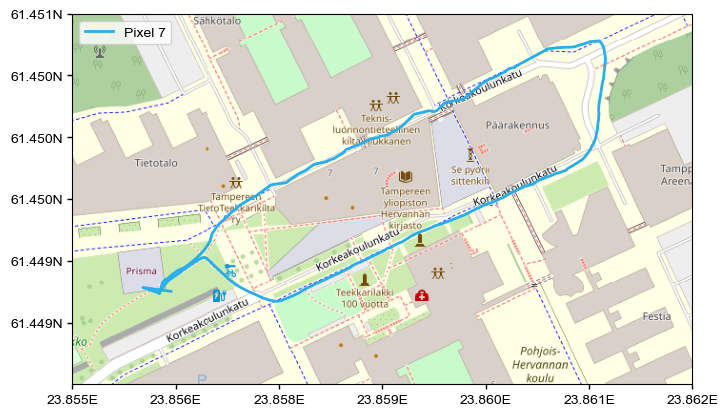

In [10]:
locations = {}
for log in logs:
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]

plotMap(locations=locations, extent=extent, scale=17)

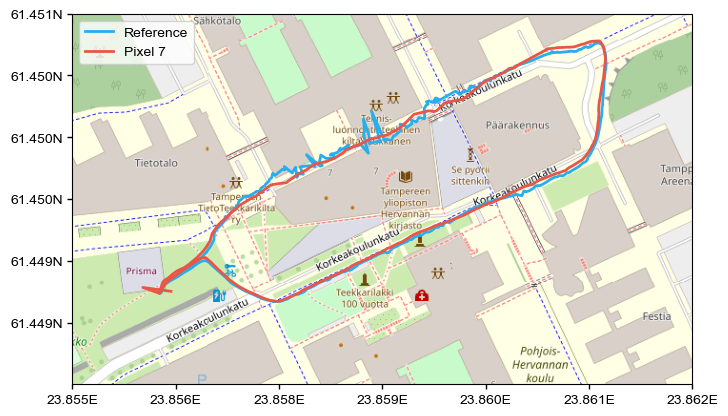

In [11]:

for log in logs:
    locations = {}
    locations['Reference'] = log.pos.df[["latitude", "longitude"]]
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
    plotMap(locations=locations, extent=extent, scale=17)

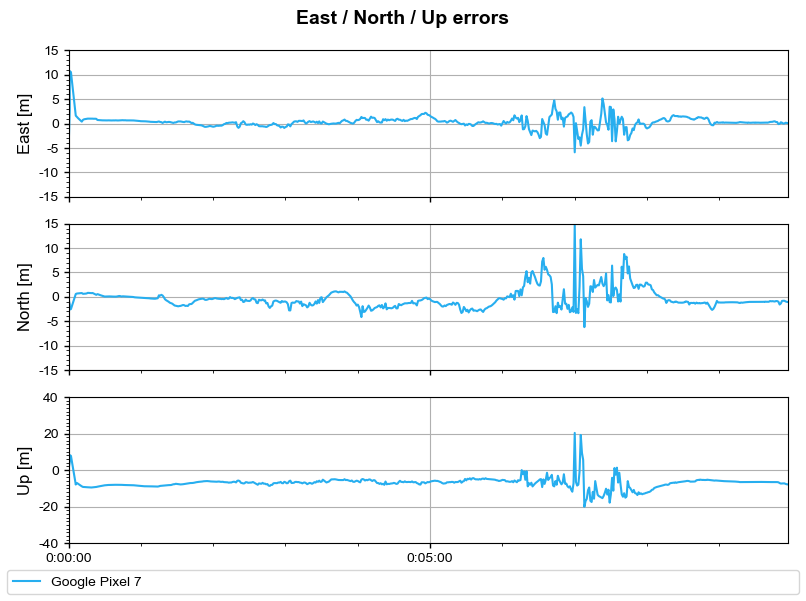

In [12]:
plotENU(logs, lim=[15,15,40], ticks=[1, 5, 1, 5, 2, 20], mode='difference')

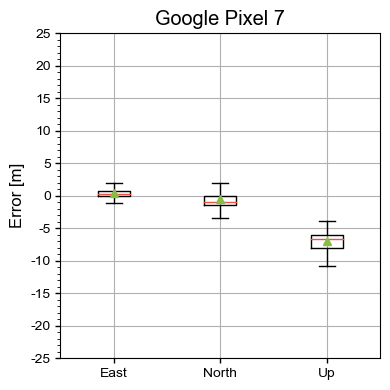

In [13]:
plotStatisticsENU(logs, mode='box', lim=25, ticks=[1, 5])

### Visibility

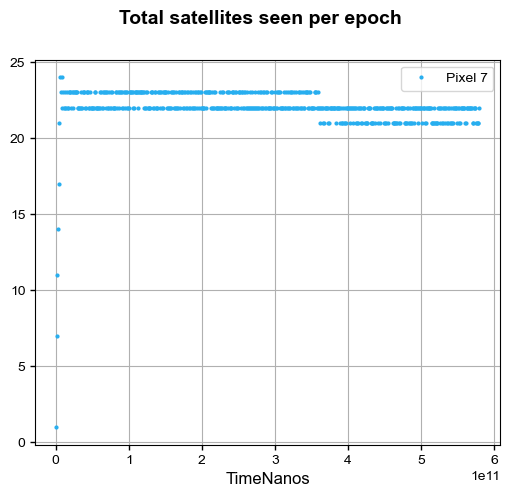

In [14]:
plotTotalSatellitesPerEpochs(logs)

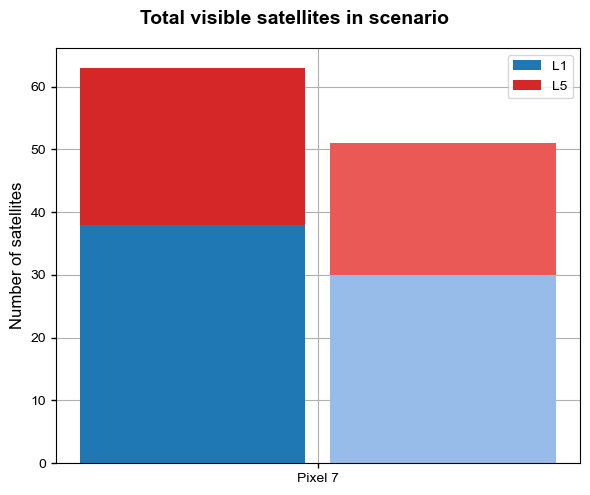

In [16]:
plotTotalSatellitesBar(logs, normalised=False)

### Measurements

In [54]:
def plotStatisticsDataBox_ref(ref, data_names, ylabel, systems, lim, ticks):

    minor_ticks = ticks[0]
    major_ticks = ticks[1]

    sats = list(set(ref.df["sv"]))
    sats.sort()
    
    data = []
    labels = []
    for sys in systems:
        _sats = [item for item in sats if item.startswith(sys)]
        for signal in data_names:
            _df = ref.df.loc[ref.df['sv'].isin(_sats), [signal]]

            # # Filter if neeeded
            # q = df[data_name].quantile(0.99)
            # df[data_name] = df[df[data_name].abs() < q]

            _data = _df[signal]
            _data = _data[~np.isnan(_data)].tolist()
            
            if len(_data) != 0:
                data.append(_data)
            else:
                data.append([float('nan'), float('nan')])
            labels.append(f"{misc.getSystemStr(sys)}-{signal}")
    
    fig, axs = plt.subplots(1, figsize=(8,5))
    fig.suptitle(f"{ref.device}")
    axs.boxplot(data, showmeans=True, showfliers=False)
    axs.set_xticks([y + 1 for y in range(len(data))], labels=labels)
    axs.set_ylabel(ylabel)

    axs.yaxis.set_major_locator(MultipleLocator(major_ticks))
    axs.yaxis.set_major_formatter('{x:.1f}')
    axs.yaxis.set_minor_locator(MultipleLocator(minor_ticks))

    plt.ylim(-lim, lim)
    axs.set_axisbelow(True)
    handles, labels = axs.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.tight_layout()


Pseudoranges

--- Pixel 7 ---
Rows removed 7 (0.058%)
            Pixel 7
count  12018.000000
mean       0.124266
std        9.751511
min     -153.535509
50%        0.130270
66.7%      1.423095
95%       12.954853
99.7%     42.189841
max      246.958558


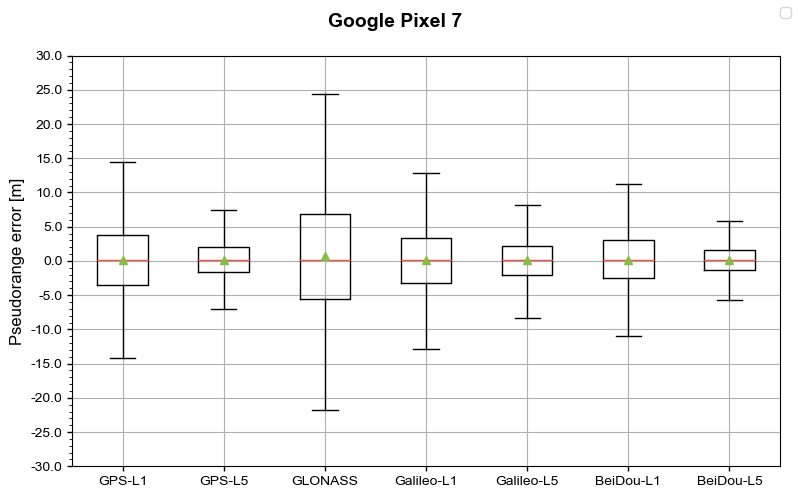

In [60]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'PseudorangeAcceleration', 300)
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    stats.append(log.raw['PseudorangeAcceleration'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

plotStatisticsDataBox(_logs, 
                      'PseudorangeAcceleration', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5])


In [92]:
_logs = copy.deepcopy(logs)
measurements = ['L1C_error', 'L5Q_error']
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    for meas in measurements:
        log.ref.df = misc.filterValues(log.ref.df, meas, 30)
    stats.append(log.ref.df[measurements].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

#plotStatisticsDataBox_ref(_logs[0].ref, measurements, 'Pseudorange [m]', ['G', 'R', 'E'], lim=3, ticks=[0.1,1])

_logs[0].ref.df.loc[_logs[0].ref.df['sv'].isin(['C27']), ['C2I_error']]

--- Pixel 7 ---
Rows removed 579 (4.813%)
Rows removed 0 (0.000%)
          Pixel 7                                                       \
            count      mean       std     min    50%     66.7%     95%   
L1C_error  6447.0  0.358604  1.379317 -29.976  0.352  0.539482  1.3628   
L5Q_error  6447.0  0.270736  0.725345 -15.355  0.263  0.404000  0.9830   

                             
              99.7%     max  
L1C_error  6.798466  29.908  
L5Q_error  4.126706  16.144  


,C2I_error
time,


In [ ]:
for log in _logs:
    print(f"--- {log.device} ---")
    count = log.raw[list(misc.GnssState_Str.values())].count()
    df = log.raw[list(misc.GnssState_Str.values())].sum().div(count).mul(100).transpose()
    print(df)

Doppler

In [ ]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'DopplerError', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

plotStatisticsDataBox(_logs, 
                      'DopplerError', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.05,0.5])

Phases

In [ ]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    #log.raw = misc.filterPercentile(log.raw, 'PhaseError', 0.997)
    log.raw = misc.filterValues(log.raw, 'PhaseError', 3)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))
plotStatisticsDataBox(_logs, 
                      'PhaseError', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.05,0.5])
    

In [ ]:
_logs = copy.deepcopy(logs)
for log in _logs:
    log.raw[list(misc.GnssStateADR_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['AccumulatedDeltaRangeState'], bits=5, type='phase'), axis='columns', result_type='expand')


In [ ]:
for log in _logs:
    print(f"--- {log.device} ---")
    count = log.raw[list(misc.GnssStateADR_Str.values())].count()
    print(log.raw[list(misc.GnssStateADR_Str.values())].sum().div(count).mul(100))

C/N0

In [ ]:
_logs = copy.deepcopy(logs)
plotStatisticsDataViolin(
    _logs, 
    'Cn0DbHz', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10])